In [24]:
#import libraries
import pandas as pd
import numpy as np

In [25]:
#retrieve data from stock csv
_df = pd.read_csv('/kaggle/input/nsei-prev-data/in_nsei_daily.csv', index_col='minute', parse_dates=True)
_df = _df.interpolate()
_df

,ticker,instrument_token,open,high,low,close
minute,,,,,,
2017-01-02 09:15:00+05:30,NSEI,uf-n-1647516806122,8211.70,8211.70,8134.30,8178.70
2017-01-03 09:15:00+05:30,NSEI,uf-n-1647516806122,8195.25,8219.00,8148.65,8188.60
2017-01-04 09:15:00+05:30,NSEI,uf-n-1647516806122,8201.60,8218.45,8180.95,8196.55
2017-01-05 09:15:00+05:30,NSEI,uf-n-1647516806122,8227.75,8282.55,8223.90,8269.90
2017-01-06 09:15:00+05:30,NSEI,uf-n-1647516806122,8283.50,8306.50,8233.45,8247.85
...,...,...,...,...,...,...
2022-12-26 09:15:00+05:30,NSEI,uf-n-1647516806122,17832.90,18084.10,17774.25,18010.30
2022-12-27 09:15:00+05:30,NSEI,uf-n-1647516806122,18081.90,18149.25,17967.45,18136.00
2022-12-28 09:15:00+05:30,NSEI,uf-n-1647516806122,18093.00,18173.10,18068.35,18109.25


In [26]:
#get closing prices
prices = _df['close']
prices

minute
2017-01-02 09:15:00+05:30     8178.70
2017-01-03 09:15:00+05:30     8188.60
2017-01-04 09:15:00+05:30     8196.55
2017-01-05 09:15:00+05:30     8269.90
2017-01-06 09:15:00+05:30     8247.85
                               ...   
2022-12-26 09:15:00+05:30    18010.30
2022-12-27 09:15:00+05:30    18136.00
2022-12-28 09:15:00+05:30    18109.25
2022-12-29 09:15:00+05:30    18207.10
2022-12-30 09:15:00+05:30    18117.05
Name: close, Length: 1478, dtype: float64

In [27]:
#calculate returns
returns = prices.pct_change()
returns

minute
2017-01-02 09:15:00+05:30         NaN
2017-01-03 09:15:00+05:30    0.001210
2017-01-04 09:15:00+05:30    0.000971
2017-01-05 09:15:00+05:30    0.008949
2017-01-06 09:15:00+05:30   -0.002666
                               ...   
2022-12-26 09:15:00+05:30    0.010447
2022-12-27 09:15:00+05:30    0.006979
2022-12-28 09:15:00+05:30   -0.001475
2022-12-29 09:15:00+05:30    0.005403
2022-12-30 09:15:00+05:30   -0.004946
Name: close, Length: 1478, dtype: float64

<AxesSubplot:xlabel='minute'>

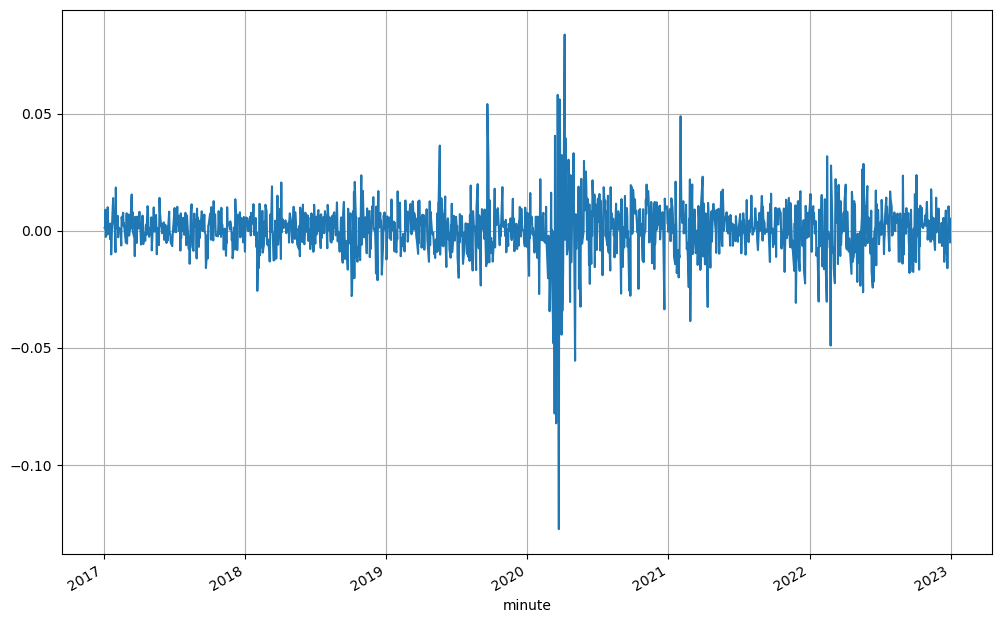

In [28]:
returns.plot(figsize=(12,8),grid=True)

In [29]:
#calculate cummulated returns using formula
cumm_returns=(prices/prices.shift(3)-1)
cumm_returns

minute
2017-01-02 09:15:00+05:30         NaN
2017-01-03 09:15:00+05:30         NaN
2017-01-04 09:15:00+05:30         NaN
2017-01-05 09:15:00+05:30    0.011151
2017-01-06 09:15:00+05:30    0.007236
                               ...   
2022-12-26 09:15:00+05:30   -0.010727
2022-12-27 09:15:00+05:30    0.001223
2022-12-28 09:15:00+05:30    0.015998
2022-12-29 09:15:00+05:30    0.010927
2022-12-30 09:15:00+05:30   -0.001045
Name: close, Length: 1478, dtype: float64

<AxesSubplot:xlabel='minute'>

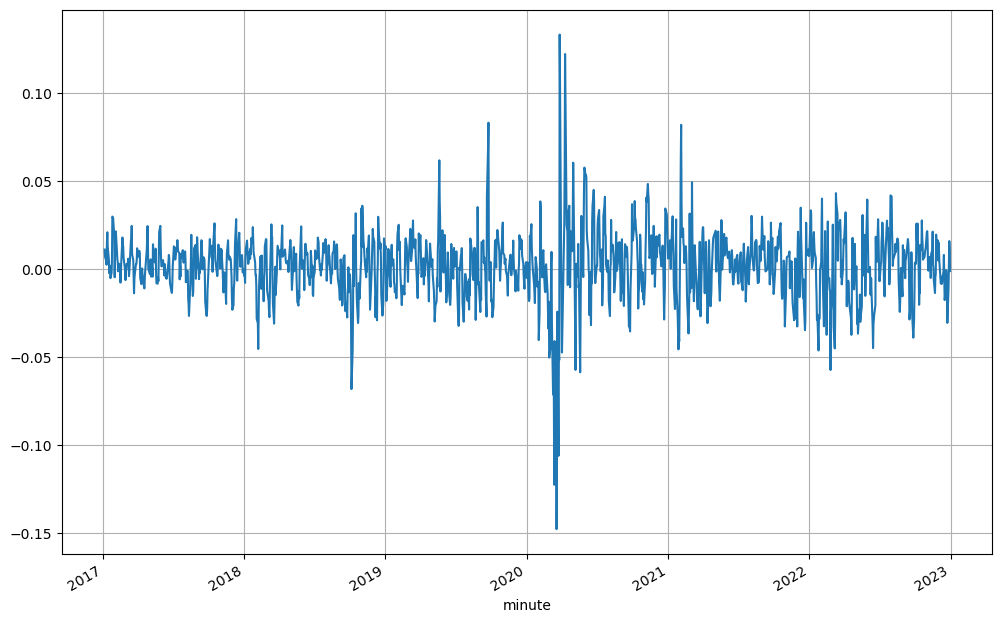

In [30]:
cumm_returns.plot(figsize=(12,8),grid=True)

In [31]:
#calculate cummulated returns using function
cummulated_returns=(1+returns).cumprod()-1
cummulated_returns

minute
2017-01-02 09:15:00+05:30         NaN
2017-01-03 09:15:00+05:30    0.001210
2017-01-04 09:15:00+05:30    0.002182
2017-01-05 09:15:00+05:30    0.011151
2017-01-06 09:15:00+05:30    0.008455
                               ...   
2022-12-26 09:15:00+05:30    1.202098
2022-12-27 09:15:00+05:30    1.217467
2022-12-28 09:15:00+05:30    1.214197
2022-12-29 09:15:00+05:30    1.226161
2022-12-30 09:15:00+05:30    1.215150
Name: close, Length: 1478, dtype: float64

In [32]:
#calculating log returns using close prices
log_returns_=np.log(prices/prices.shift(1))
log_returns_

minute
2017-01-02 09:15:00+05:30         NaN
2017-01-03 09:15:00+05:30    0.001210
2017-01-04 09:15:00+05:30    0.000970
2017-01-05 09:15:00+05:30    0.008909
2017-01-06 09:15:00+05:30   -0.002670
                               ...   
2022-12-26 09:15:00+05:30    0.010392
2022-12-27 09:15:00+05:30    0.006955
2022-12-28 09:15:00+05:30   -0.001476
2022-12-29 09:15:00+05:30    0.005389
2022-12-30 09:15:00+05:30   -0.004958
Name: close, Length: 1478, dtype: float64

In [33]:
#calculating log returns
log_returns=np.log(1+returns)
log_returns

minute
2017-01-02 09:15:00+05:30         NaN
2017-01-03 09:15:00+05:30    0.001210
2017-01-04 09:15:00+05:30    0.000970
2017-01-05 09:15:00+05:30    0.008909
2017-01-06 09:15:00+05:30   -0.002670
                               ...   
2022-12-26 09:15:00+05:30    0.010392
2022-12-27 09:15:00+05:30    0.006955
2022-12-28 09:15:00+05:30   -0.001476
2022-12-29 09:15:00+05:30    0.005389
2022-12-30 09:15:00+05:30   -0.004958
Name: close, Length: 1478, dtype: float64

<AxesSubplot:xlabel='minute'>

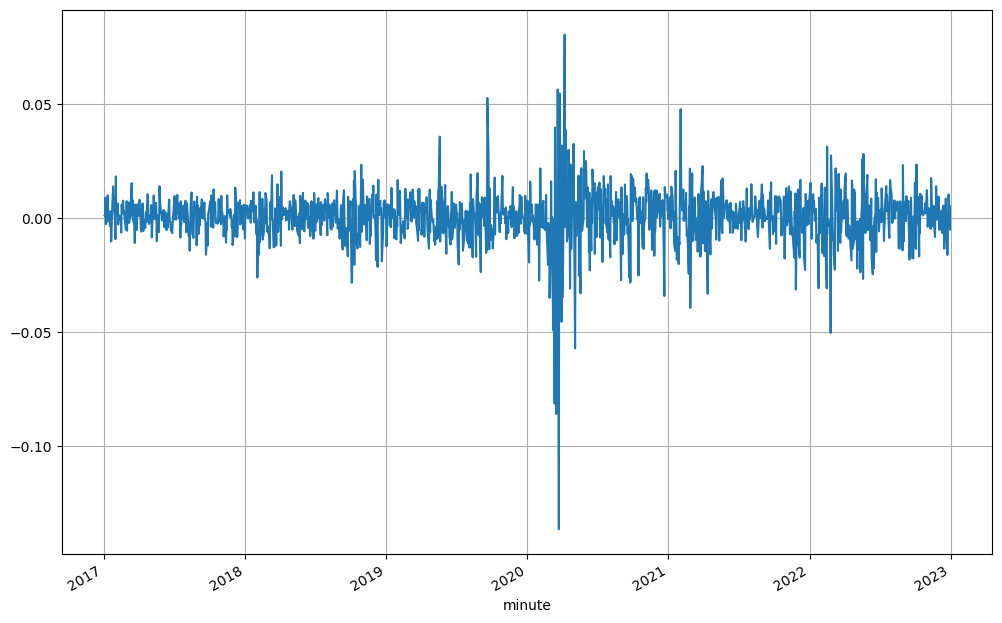

In [34]:
log_returns.plot(figsize=(12,8),grid=True)

In [35]:
#summing up returns
sum_returns=np.log(1+returns).cumsum()
sum_returns

minute
2017-01-02 09:15:00+05:30         NaN
2017-01-03 09:15:00+05:30    0.001210
2017-01-04 09:15:00+05:30    0.002180
2017-01-05 09:15:00+05:30    0.011089
2017-01-06 09:15:00+05:30    0.008419
                               ...   
2022-12-26 09:15:00+05:30    0.789411
2022-12-27 09:15:00+05:30    0.796366
2022-12-28 09:15:00+05:30    0.794890
2022-12-29 09:15:00+05:30    0.800278
2022-12-30 09:15:00+05:30    0.795320
Name: close, Length: 1478, dtype: float64

<AxesSubplot:xlabel='minute'>

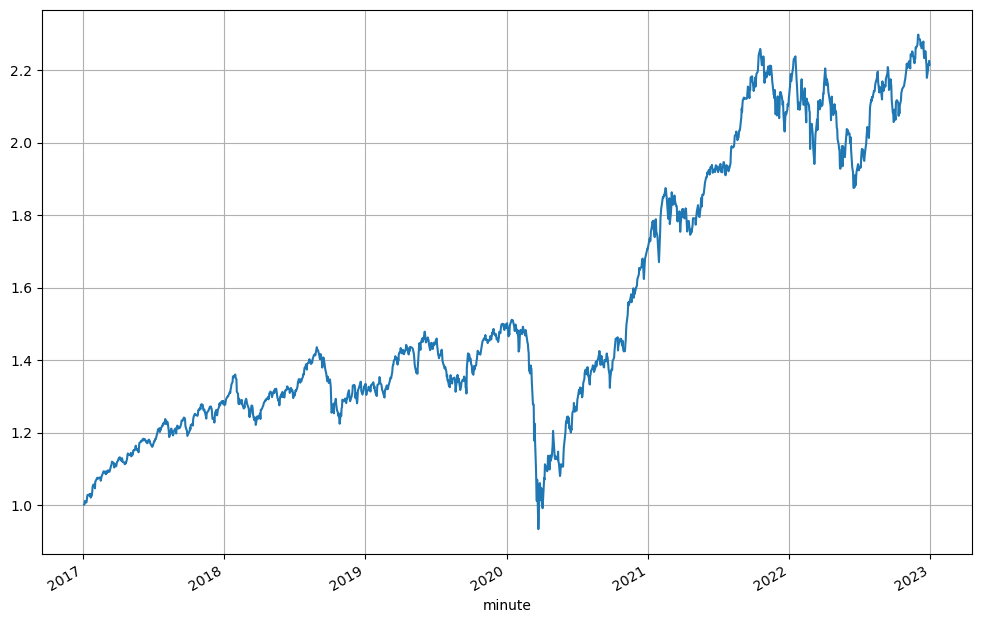

In [36]:
sum_returns.apply(np.exp).plot(figsize=(12,8),grid=True)

In [49]:
data_=[]
for i in range(len(prices)):
    data_.append({'Date':prices.index[i], 'Close Price': prices[i], 'Returns':returns[i], 'Log Returns': log_returns[i]})

In [50]:
#append data to a list and store in csv
import csv
import os

headers = ['Date','Close Price','Returns', 'Log Returns']

if os.path.exists('/kaggle/working/nsei_stock.csv'):
    with open('nsei_stock.csv', mode='a', newline='') as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames=headers)
        for row in data_:
            writer.writerow(row)
else:
    with open('nsei_stock.csv', mode='w', newline='') as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames=headers)
        writer.writeheader()
        for row in data_:
            writer.writerow(row)